# Physique avec collision avec le plan

## Définition des classes de base

In [7]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
# %matplotlib inline


class Point:
    def __init__(self, 
                 position=[0, 0, 0], 
                 speed=[0, 0, 0], 
                 forces=[0, -9.81, 0],
                 mass=1.):
        self.position = np.array(position)
        self.previous_position = np.array(position)
        self.speed = np.array(speed)
        self.previous_speed = np.array(speed)
        self.forces = np.array(forces)
        self.previous_forces = np.array(forces)
        self.mass = mass
        
    def compute_new_position(self, delta_t):
        self.previous_position = self.position
        self.position = self.position + delta_t * self.speed
        
    def compute_new_speed(self, delta_t):
        self.previous_speed = self.speed
        self.speed = self.speed + delta_t * self.forces / self.mass


class Environment:
    def __init__(self, points, delta_t):
        self.points = points
        self.delta_t = delta_t
        self.history = [[p.position for p in points]]
    
    def compute_step(self):
        for p in self.points:
            p.compute_new_position(delta_t=self.delta_t)
            p.compute_new_speed(delta_t=self.delta_t)
        self.history.append([p.position for p in self.points])
        
    def run_episode(self, nb_steps=10):
        for i in tqdm(range(nb_steps)):
            self.compute_step()
            
        

In [8]:
def compute_collision_point_vs_infinite_plane(point, plane, delta_t, elasticity=1.):
    projection_previous_point = np.dot(point.previous_position, plane.vector)
    projection_point = np.dot(point.position, plane.vector)
    projection_plane = np.dot(plane.vector, plane.position)


    if projection_point <= projection_plane:
#         print(projection_point)
        
        delta_t_impact = np.abs(delta_t *\
         (projection_previous_point - projection_plane) /\
         (projection_point - projection_previous_point))
        
#         print(delta_t_impact)
        
        impact_position = point.previous_position + delta_t_impact * point.previous_speed
#         print(impact_position)
        
        new_speed = elasticity * (point.previous_speed - 2 * np.dot(point.previous_speed, plane.vector) * plane.vector + point.previous_forces * (delta_t - delta_t_impact) / point.mass)
        
        new_position = impact_position + new_speed * (delta_t - delta_t_impact)
        
        point.speed = new_speed
        point.position = new_position
        
        return impact_position

In [9]:
class EnvironmentWithPlanes(Environment):
    def __init__(self, points, planes, delta_t):
        Environment.__init__(self, points=points, delta_t=delta_t)
        self.planes = planes
        self.impact_positions = []
    
    def compute_step(self):
        for p in self.points:
            p.compute_new_position(delta_t=self.delta_t)
            p.compute_new_speed(delta_t=self.delta_t)
            for plane in self.planes:
                self.impact_positions.append(compute_collision_point_vs_infinite_plane(p, plane, delta_t=self.delta_t))
        self.history.append([p.position for p in self.points])
        

In [16]:
class Plane(Point):
    def __init__(self, 
                 position=[0, 0, 0], 
                 speed=[0, 0,0], 
                 mass=np.inf,  
                 forces=[0, 0, 0],
                 vector=[0, 1, 0],
                 width=None):
        Point.__init__(self, 
                       position=position, 
                       speed=speed, 
                       forces=forces, 
                       mass=mass)
        self.vector = np.array(vector) / np.linalg.norm(vector)
        self.width = width

# Gaz dans un compartiment

100%|██████████| 100/100 [00:00<00:00, 1972.60it/s]


<IPython.core.display.Javascript object>


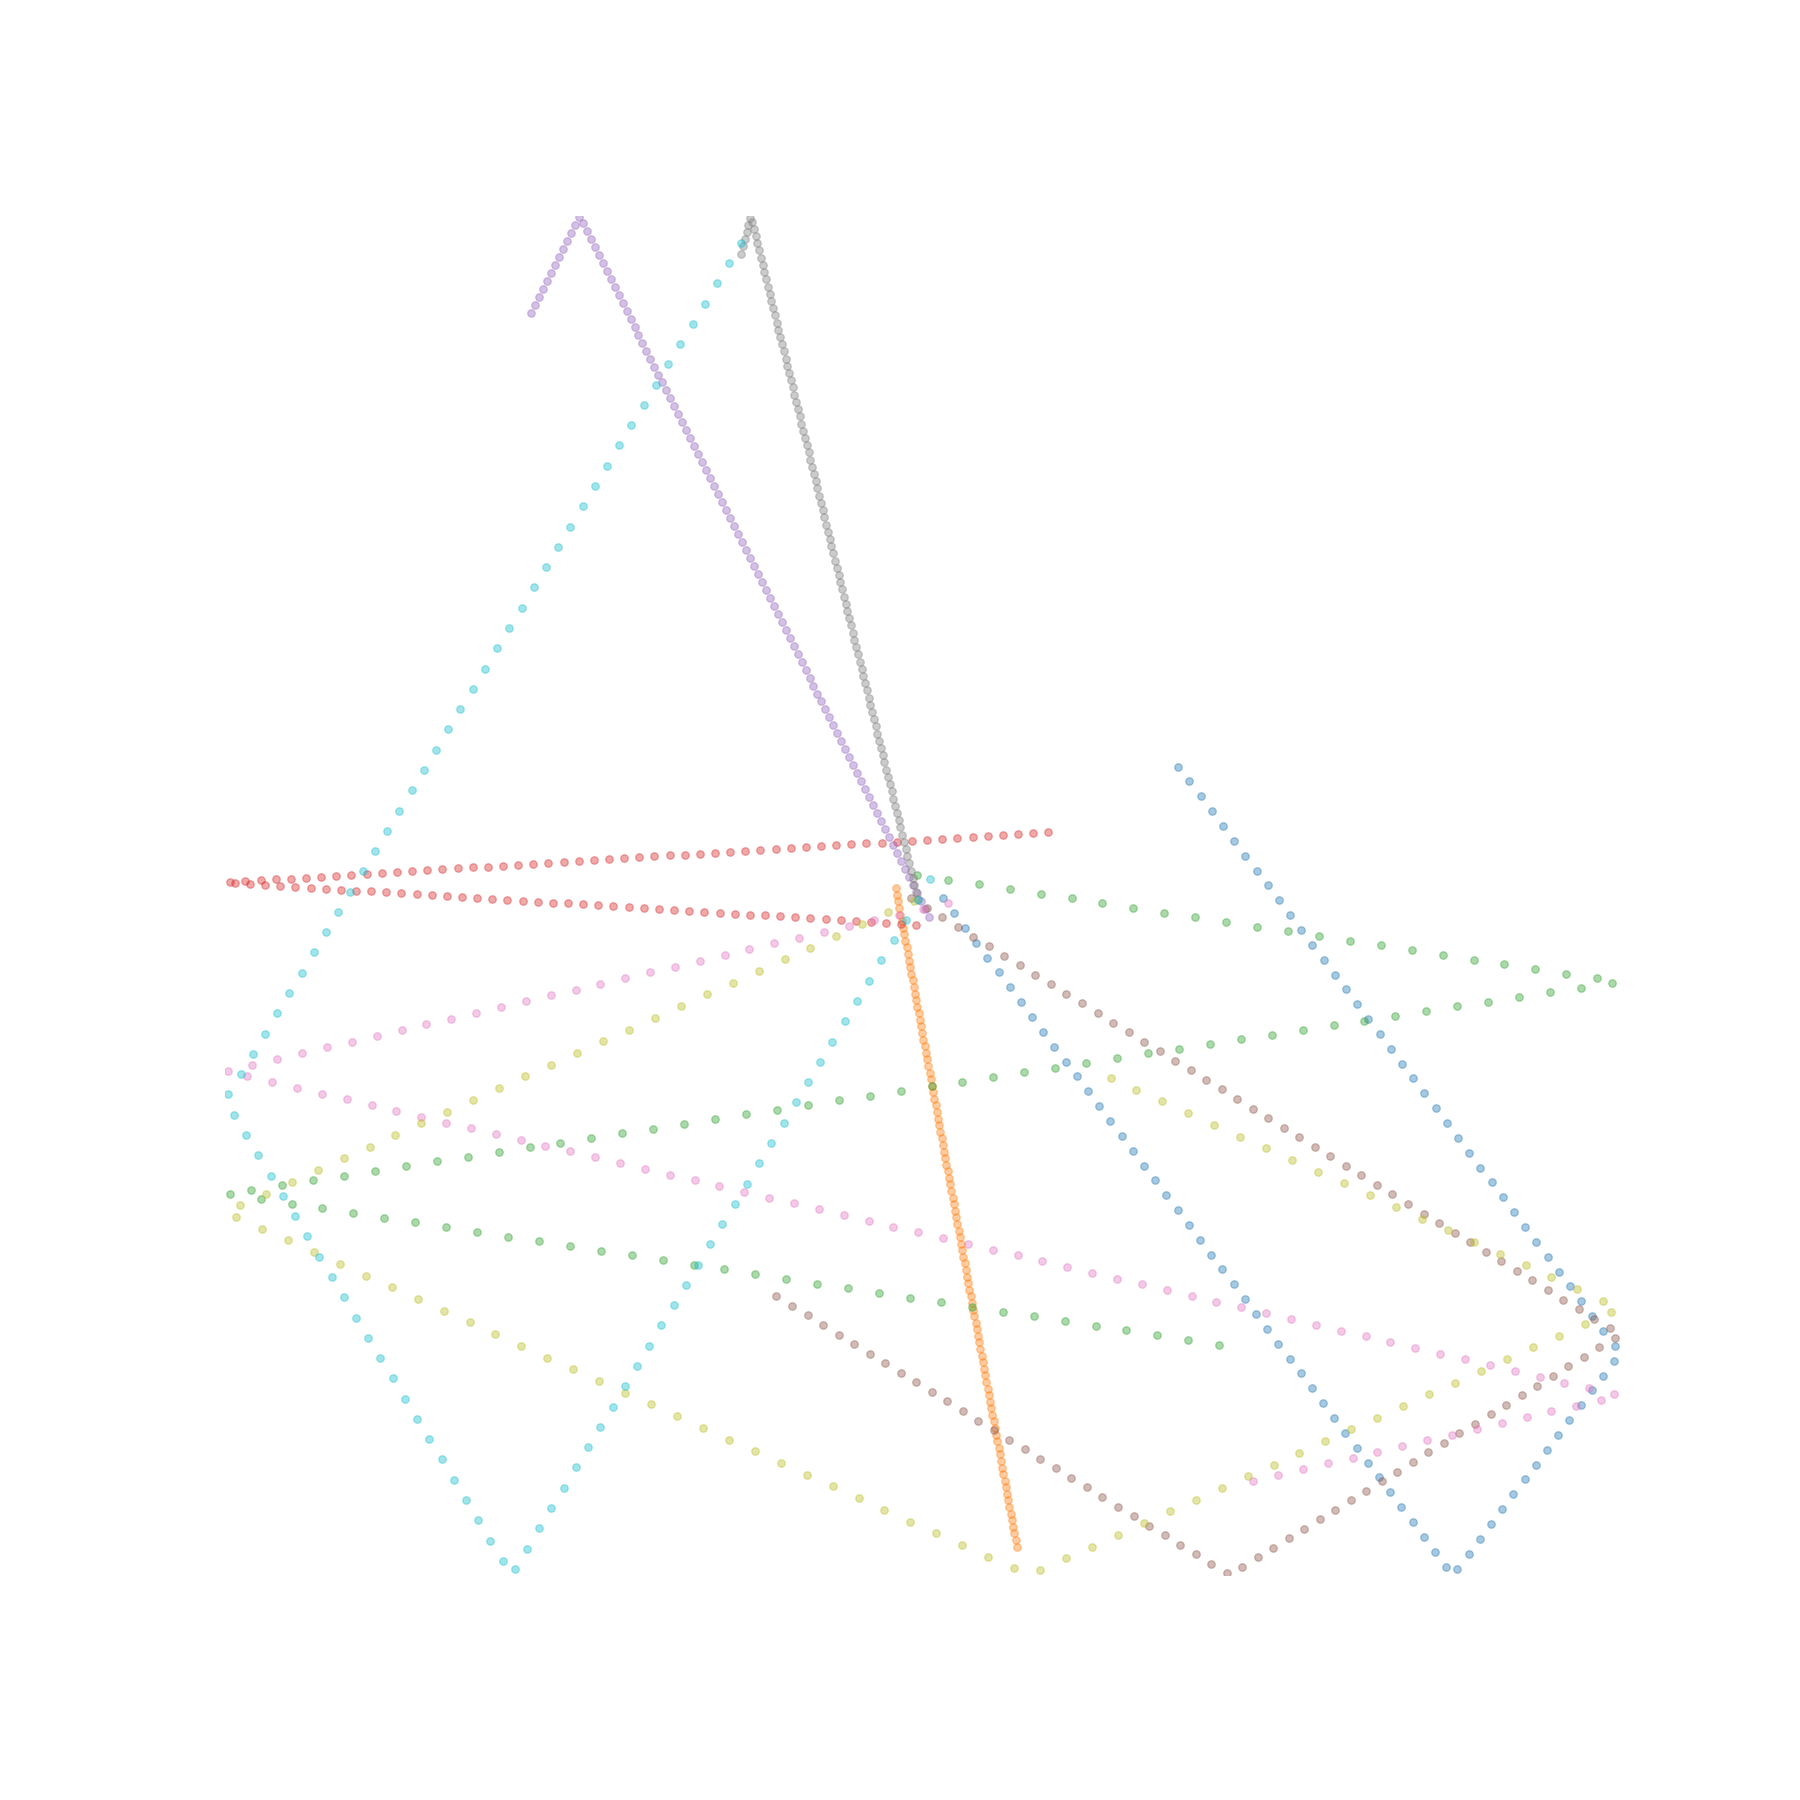

In [17]:
planes = [
    Plane(position=[0, -5, 0], vector=[0, 1, 0]),
    Plane(position=[0, 5, 0], vector=[0, -1, 0]),
    Plane(position=[-5, 0, 0], vector=[1, 0, 0]),
    Plane(position=[5, 0, 0], vector=[-1, 0, 0]),
    Plane(position=[0, 0, -5], vector=[0, 0, 1]),
    Plane(position=[0, 0, 5], vector=[0, 0, -1]),
]

nb_points = 10

initial_positions = np.random.normal(size=(nb_points, 3)) * .1 #* 10 - 5
initial_positions[:, 2] = 0

initial_speeds = np.random.normal(size=(nb_points, 3))
initial_speeds[:, 2] = 0

points = [
    Point(
        position=initial_positions[i, :], 
        speed=initial_speeds[i, :],
        forces=[0, 0, 0]
    ) for i in range(nb_points)
]

environment = EnvironmentWithPlanes(points=points, planes=planes, delta_t=.1)

environment.run_episode(100)

history = np.array(environment.history)

plt.figure(figsize=(20, 20))
# plt.axvline(x=-5, ymin=-5, ymax=5, color='red')
# plt.axvline(x=5, ymin=-5, ymax=5, color='red')
# plt.axhline(y=5, xmin=-5, xmax=5, color='red')
# plt.axhline(y=-5, xmin=-5, xmax=5, color='red')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
# plt.z
plt.axis('off')

for i in range(nb_points):
    plt.scatter(history[:, i, 0], history[:, i, 1], alpha=.4)
#     plt.plot(history[:, i, 0], history[:, i, 1], alpha=.4)
    
plt.show()

100%|██████████| 100/100 [00:00<00:00, 3157.70it/s]


<IPython.core.display.Javascript object>


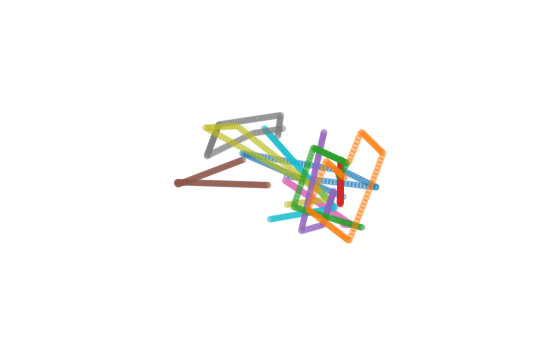

In [15]:
planes = [
    Plane(position=[0, -5, 0], vector=[0, 1, 0]),
    Plane(position=[0, 5, 0], vector=[0, -1, 0]),
    Plane(position=[-5, 0, 0], vector=[1, 0, 0]),
    Plane(position=[5, 0, 0], vector=[-1, 0, 0]),
    Plane(position=[0, 0, -5], vector=[0, 0, 1]),
    Plane(position=[0, 0, 5], vector=[0, 0, -1]),
]

nb_points = 10

initial_positions = np.random.uniform(size=(nb_points, 3)) * 10 - 5

initial_speeds = np.random.normal(size=(nb_points, 3))

points = [
    Point(
        position=initial_positions[i, :], 
        speed=initial_speeds[i, :],
        forces=[0, 0, 0]
    ) for i in range(nb_points)
]

environment = EnvironmentWithPlanes(points=points, planes=planes, delta_t=.1)

environment.run_episode(100)

history = np.array(environment.history)

# plt.figure(figsize=(20, 20))
# plt.axvline(x=-5, ymin=-5, ymax=5, color='red')
# plt.axvline(x=5, ymin=-5, ymax=5, color='red')
# plt.axhline(y=5, xmin=-5, xmax=5, color='red')
# plt.axhline(y=-5, xmin=-5, xmax=5, color='red')
# plt.xlim(-5, 5)
# plt.ylim(-5, 5)
# plt.z

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.axis('off')


for i in range(nb_points):
    ax.scatter(history[:, i, 0], history[:, i, 1], history[:, i, 2], alpha=.4)
#     plt.plot(history[:, i, 0], history[:, i, 1], alpha=.4)
    
plt.show()